In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Laplace distribution

$f(x) = \frac{\alpha}{2}e^{-\alpha|x-\beta|}$

$\mathbb{E}X = \beta$

$\mathbb{D}X = \frac{2}{\alpha^2}$

Зададим исходное распределение Лапласа. Построим график функции плотности вероятности и выборочную (n=1000) гистограмму

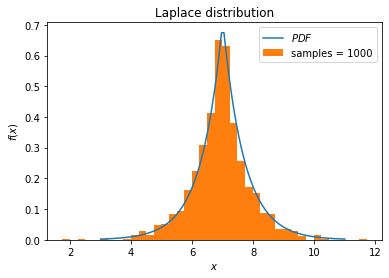

In [138]:
alpha = 0.7
beta = 7
laplace_rv = sts.laplace(beta, alpha)
sample = laplace_rv.rvs(1000)
x = np.linspace(3,11,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label="$PDF$")
plt.hist(sample, bins=40, density=True, label="samples = 1000")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title("Laplace distribution")
plt.legend()
plt.show()

Генерируем выборки размеров 5, 10 и 50. Выборочное среднее считается по формуле $\overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i$

In [131]:
nsamples = [5, 10, 50]
sample_means = {5:[], 10:[], 50:[]}
for n in nsamples:
    for i in range(1000):
        sample_mean_est = laplace_rv.rvs(n).mean()
        sample_means[n].append(sample_mean_est)

Построим выборочные гистограммы и графики плотностей соответствующих нормальных распределений вида $N(\beta, \frac{2}{\alpha^2n}), \alpha = 0.7, \beta = 7$

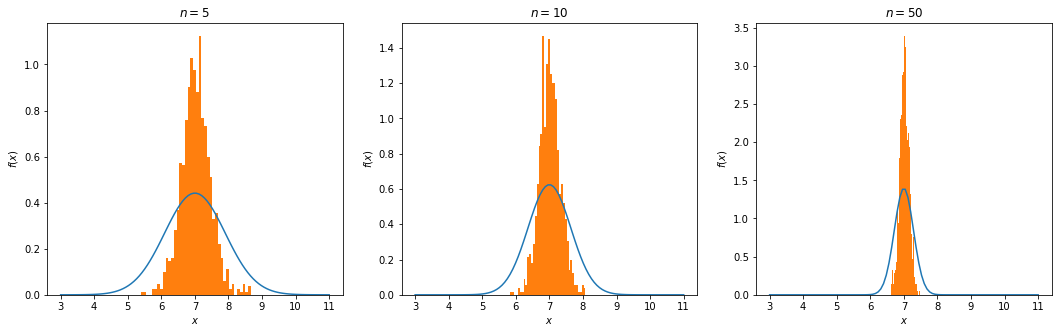

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

'''
n=5
EX = 7
DX = 0.82
'''
theory = sts.norm(beta, ((2/alpha**2)/5)**0.5).pdf(x)
ax[0].plot(x, theory)
ax[0].hist(sample_means[5], bins=40, density=True)
ax[0].set_title("$n = 5$")
ax[0].set_ylabel('$f(x)$')
ax[0].set_xlabel('$x$')

'''
n=10
EX = 7
DX = 0.41
'''
theory = sts.norm(beta, ((2/alpha**2)/10)**0.5).pdf(x)
ax[1].plot(x, theory)
ax[1].hist(sample_means[10], bins=40, density=True)
ax[1].set_title("$n = 10$")
ax[1].set_ylabel('$f(x)$')
ax[1].set_xlabel('$x$')

'''
n=50
EX = 7
DX = 0.08
'''
theory = sts.norm(beta, ((2/alpha**2)/50)**0.5).pdf(x)
ax[2].plot(x, theory)
ax[2].hist(sample_means[50], bins=40, density=True, histtype='stepfilled')
ax[2].set_title("$n = 50$")
ax[2].set_ylabel('$f(x)$')
ax[2].set_xlabel('$x$')

plt.show()

В соответствии с ЦПТ распределение выборочных средних получилось описать нормальным распределением. С увеличением числа элементов в выборках дисперсия выборочных средних уменьшается и аппроксимация становится точнее.